## Decision Trees

### Building a decision tree with the training set



Classes are:
Drug <A>
Drug <B>

Decision Tree:
- age
    - young
        - sex
            - F <A> (leaf node)
            - M <B> (leaf node)
    - middle-age <B> (leaf node)

    - senior
        - cholesterol
            - high <A> (leaf node)
            - normal <B> (leaf node)

- Each "internal node" corresponds to a test.
- And each "branch" corresponds to a result of the test.
- And each "leaf node" assigns a patient to a class.
- Tüm attributeları tek tek değerlendirmeye alarak karar veriyoruz
- Hangisinin daha accurate olduğuna karar vererek kurarsak daha doğru olur
- Entropiyi hesaplayıp en düşük entropili attr. seçiyoruz


1. Choose an attribute from dataset
2. Calculate the significance of the attribute in the splitting of the data.
3. Split the data based on the value of the best attribute.
4. Go to step 1.

#### Building Decision Trees
Decision trees are built using recursive partitioning to classify the data.

- More predictiveness
- Less Impurity
- Lower Entropy

"Pure Node": A node in the tree is considered pure if, in all of the cases, the nodes fall into a spesific category.

## Entropy
Information disorder or randomness in the data.
The entropy is used to calculate the homogeneity of the samples in that node.


"The tree with the higher information gain after splitting."
Information gain = Entropy before split - Weighted entropy after split

## Example
- Build multi-class model for decision tree and visualize trained dataset

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


In [33]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


- LabelEncoder()
- train_test_split
- DecisionTreeClassifier(criterion="entropy",)
- plot_tree()

In [35]:
def encode_categorical_variable(categorical_data):
    le = LabelEncoder()
    train = categorical_data.unique()
    return le.fit(train).transform(categorical_data)


In [36]:
df['Sex'] = encode_categorical_variable(df['Sex'])
df['BP'] = encode_categorical_variable(df['BP'])
df['Cholesterol'] = encode_categorical_variable(df['Cholesterol'])


In [37]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [38]:
scaler = StandardScaler()
scaler.fit(df.drop('Drug', axis=1))
scaled_features = scaler.transform(df.drop('Drug',axis=1)).reshape(200,5)


In [39]:
df_normalized= pd.DataFrame(scaled_features,columns=df.drop('Drug', axis=1).columns)
df_normalized.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.291591,-1.040833,-1.110169,-0.970437,1.286522
1,0.162699,0.960769,0.109797,-0.970437,-0.415145
2,0.162699,0.960769,0.109797,-0.970437,-0.828558
3,-0.988614,-1.040833,1.329763,-0.970437,-1.149963
4,1.011034,-1.040833,0.109797,-0.970437,0.271794


In [40]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [41]:
X_train, X_test, y_train, y_test = train_test_split( df_normalized, df['Drug'], test_size=0.2, random_state=10)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
   

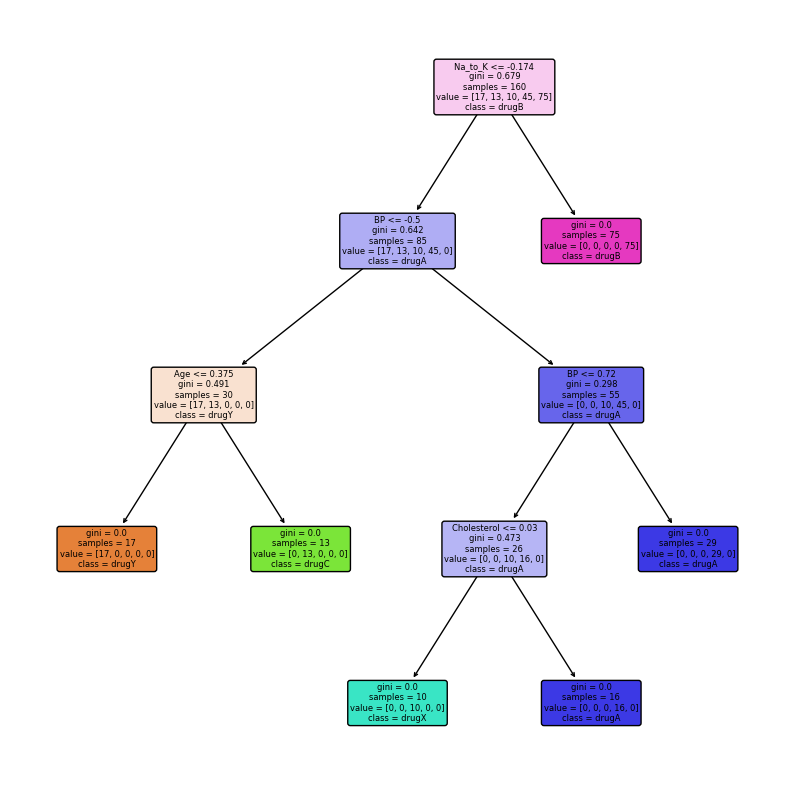

In [54]:
# Decision Tree Plot
plt.figure(figsize=(10,10))  
_ = plot_tree(classifier, feature_names = df_normalized.columns, class_names = df.Drug.unique(),
             filled=True, fontsize=6, rounded = True)
plt.show()